In [1]:
from tick.hawkes import HawkesExpKern, SimuHawkesExpKernels
import pickle
import numpy as np
import pandas as pd

event_type_times_map = pickle.load(open('data\\multivariate_attempts\\btc_usd_event_type_times_map.pkl', 'rb'))
event_times_list = [v/1000 for v in event_type_times_map.values()]
def get_abbreviation(event_type: str) -> str:
    abbreviation = ''
    for substring in event_type.split('_'):
        abbreviation += substring[0]
    return abbreviation

event_type_abbreviations = [get_abbreviation(k) for k in event_type_times_map.keys()]

decays_to_iterate = np.array([
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #ASK_MARKET_ORDER_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #BID_MARKET_ORDER_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #ASK_MARKET_ORDER_NOT_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #BID_MARKET_ORDER_NOT_CHANGER
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0], #ASK_LIMIT_ORDER_CHANGER
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1], #BID_LIMIT_ORDER_CHANGER
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], #ASK_LIMIT_ORDER_NOT_CHANGER
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 1], #BID_LIMIT_ORDER_NOT_CHANGER
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], #ASK_CANCELLED_ORDER_NOT_CHANGER
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 1], #BID_CANCELLED_ORDER_NOT_CHANGER
    ])

<AxesSubplot:>

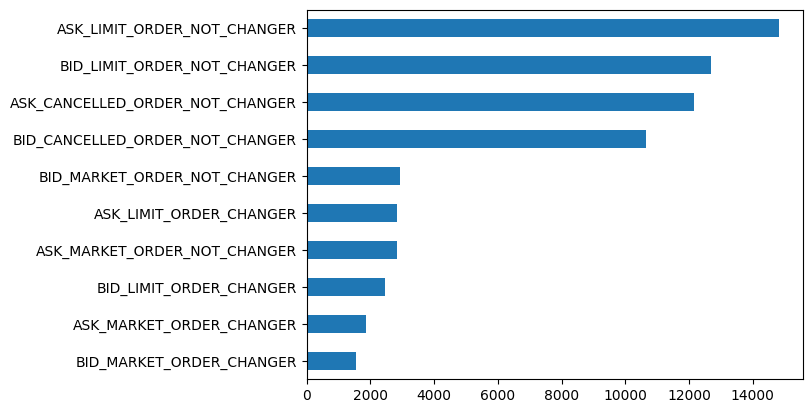

In [69]:
pd.DataFrame({k:[len(v)] for k,v in event_type_times_map.items()}).T.sort_values(by=0).plot(kind='barh', legend=False)

In [25]:
decays_to_iterate = np.array([
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #ASK_MARKET_ORDER_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #BID_MARKET_ORDER_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #ASK_MARKET_ORDER_NOT_CHANGER
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0], #BID_MARKET_ORDER_NOT_CHANGER
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0], #ASK_LIMIT_ORDER_CHANGER
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1], #BID_LIMIT_ORDER_CHANGER
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], #ASK_LIMIT_ORDER_NOT_CHANGER
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 1], #BID_LIMIT_ORDER_NOT_CHANGER
    [1, 0, 0, 0, 1, 0, 1, 0, 1, 0], #ASK_CANCELLED_ORDER_NOT_CHANGER
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 1], #BID_CANCELLED_ORDER_NOT_CHANGER
    ])

decay_value_to_test = [0.1, 0.25, 0.5, 0.75, 1, 1.25]
decays_matrix = np.zeros((10, 10))

for i in range(10):
    for j in range(10):
        decays_matrix[i][j] = 1000 if decays_to_iterate[i][j] == 0 else 0.1

In [27]:
def evaluate_model(decay_matrix, timestamps):
    learner = HawkesExpKern(decay_matrix)
    learner.fit(timestamps)
    score = learner.score()
    return score

n_nodes = len(event_times_list)

# Perform greedy search for decay matrix
best_score = evaluate_model(decays_matrix, event_times_list)
improvement = True

while improvement:
    improvement = False
    for i in range(n_nodes):
        for j in range(n_nodes):
            current_decay = decays_matrix[i, j]
            
            if current_decay < 2:
                print(f'Checking {i} -> {j} with decay {current_decay}')
                best_local_decay = current_decay
                best_local_score = best_score
                for decay in decay_value_to_test:
                    decays_matrix[i, j] = decay
                    score = evaluate_model(decays_matrix, event_times_list)
                    if score > best_local_score:
                        best_local_score = score
                        best_local_decay = decay
                decays_matrix[i, j] = best_local_decay
                if best_local_score > best_score:
                    best_score = best_local_score
                    improvement = True

decays_matrix

Checking 0 -> 0 with decay 0.1
Checking 0 -> 1 with decay 0.1
Checking 0 -> 2 with decay 0.1
Checking 0 -> 3 with decay 0.1
Checking 0 -> 4 with decay 0.1
Checking 0 -> 5 with decay 0.1
Checking 1 -> 0 with decay 0.1
Checking 1 -> 1 with decay 0.1
Checking 1 -> 2 with decay 0.1
Checking 1 -> 3 with decay 0.1
Checking 1 -> 4 with decay 0.1
Checking 1 -> 5 with decay 0.1
Checking 2 -> 0 with decay 0.1
Checking 2 -> 1 with decay 0.1
Checking 2 -> 2 with decay 0.1
Checking 2 -> 3 with decay 0.1
Checking 2 -> 4 with decay 0.1
Checking 2 -> 5 with decay 0.1
Checking 3 -> 0 with decay 0.1
Checking 3 -> 1 with decay 0.1
Checking 3 -> 2 with decay 0.1
Checking 3 -> 3 with decay 0.1
Checking 3 -> 4 with decay 0.1
Checking 3 -> 5 with decay 0.1
Checking 4 -> 0 with decay 0.1
Checking 4 -> 2 with decay 0.1
Checking 4 -> 4 with decay 0.1
Checking 4 -> 6 with decay 0.1
Checking 4 -> 8 with decay 0.1
Checking 5 -> 1 with decay 0.1
Checking 5 -> 3 with decay 0.1
Checking 5 -> 5 with decay 0.1
Checking

array([[1.00e-01, 1.00e-01, 1.25e+00, 5.00e-01, 1.25e+00, 1.00e-01,
        1.00e+03, 1.00e+03, 1.00e+03, 1.00e+03],
       [1.00e-01, 1.00e-01, 1.25e+00, 1.25e+00, 1.25e+00, 1.00e-01,
        1.00e+03, 1.00e+03, 1.00e+03, 1.00e+03],
       [5.00e-01, 1.00e-01, 1.00e-01, 1.25e+00, 1.00e-01, 1.00e-01,
        1.00e+03, 1.00e+03, 1.00e+03, 1.00e+03],
       [1.00e-01, 1.00e-01, 1.00e-01, 1.00e-01, 1.00e-01, 1.00e-01,
        1.00e+03, 1.00e+03, 1.00e+03, 1.00e+03],
       [1.00e-01, 1.00e+03, 1.00e-01, 1.00e+03, 1.00e-01, 1.00e+03,
        2.50e-01, 1.00e+03, 1.00e-01, 1.00e+03],
       [1.00e+03, 1.00e-01, 1.00e+03, 1.00e-01, 1.00e+03, 5.00e-01,
        1.00e+03, 5.00e-01, 1.00e+03, 1.00e-01],
       [1.00e-01, 1.00e+03, 1.00e+03, 1.00e+03, 1.00e-01, 1.00e+03,
        2.50e-01, 1.00e+03, 1.00e-01, 1.00e+03],
       [1.00e+03, 1.00e-01, 1.00e+03, 1.00e+03, 1.00e+03, 2.50e-01,
        1.00e+03, 2.50e-01, 1.00e+03, 1.00e-01],
       [2.50e-01, 1.00e+03, 1.00e+03, 1.00e+03, 1.00e-01, 1.00e+

In [55]:
learner = HawkesExpKern(decays_matrix)
learner.fit(event_times_list)
score = learner.score()
norms = learner.get_kernel_norms()
np.save('data\\multivariate_attempts\\btc_usd_hawkes_exp_kern_decays_matrix.npy', decays_matrix)
np.save('data\\multivariate_attempts\\btc_usd_hawkes_exp_kern_norm_matrix.npy', norms)

In [54]:
score

11.779378863072562

In [2]:
n_nodes = 2  # Number of processes (2-dimensional Hawkes process)
decay = 1.5  # Decay parameter for the kernel

# Baseline intensity for each process
baseline = np.array([0.3, 0.2])

# Hawkes kernel matrix (influence of one process on another)
# In this case, the influence is symmetric
adjacency = np.array([[0.2, 0.4],  # Process 1 influences Process 1 and Process 2
                      [0.3, 0.5]])  # Process 2 influences Process 1 and Process 2

# Create the Hawkes process simulator
hawkes = SimuHawkesExpKernels(adjacency, decay, baseline, max_jumps=10, verbose=False)

# Set the baseline and the kernel matrix with exponential decay
# Simulate the process
hawkes.simulate()

# Retrieve the timestamps for each process
timestamps = hawkes.timestamps


In [10]:
for i, times in enumerate(timestamps):
    print(f"Timestamps for process {i + 1}: {times}")


Timestamps for process 1: [ 1.01390602  2.49072482  2.57202937  9.59217618 13.74285386]
Timestamps for process 2: [ 2.09843087  2.46170057  6.87105915 11.34743839 12.42175023]


In [4]:
timestamps[0]

array([2.29805849, 2.80898385, 5.20914983, 5.38656968, 5.51127124,
       7.20446945])